# **Homework Assignment #2**

Assigned: January 24, 2022

Due: February 14, 2022



---

This assignment consists of one question that requires short answer and one Python programming task. You can enter your answers and your code directly in a Colaboratory notebook and upload the **shareable** link for your notebook as your homework submission.


---




#1.

(10 points) Consider a set of points in the 2-dimensional space plotted below. In this figure, visual distance between points also represents the distance computed by a learning algorithm.

![alt text](https://drive.google.com/uc?id=1cU4AaOdM77JGeNEoRq6GpqqjlcMz40O7)

Which value of K (K=1, K=3, or K=5) will result in the greatest leave-one-out validation accuracy for KNN classification? Explain justify your answer.


When $K=1$, the classifier assigns each point $x$ to the class of its closest neighbour. The validation accuracy is $4/14 = 28.57\%$ (4 points classified correctly out of 14 points). 

When $K=3$, the validation accuracy is $8/14 = 57.14\%$.

When $K=5$, the validation accuracy is $10/14 = 71.43\%$.

Thus, $K=5$ will result in the greatest validation accuracy for KNN classification.


#2.

(100 points) The purpose of this programming assignment is to get you familiar with the capabilities offered by the sklearn modules. To complete the assignment, you will 1) load three different datasets, 2) report the classification accuracy for 4 different classifiers, 3) visualize the data and predictions, and 4) graph the learned decison tree.

1) Datasets. Sklearn offers multiple methods to load datasets for learning. Your program should use three of these methods.

* Use the built-in sklearn.datasets capability to load the breast_cancer dataset. The load_breast_cancer() function returns two structures, one containing the features for each data point and the other containing the corresponding ground truth labels ('malignant' and 'benign').

* Use the fetch_openml function to load the credit-g dataset. Note that the labels for this dataset are 'good' and 'bad'. The fetch_openml() function returns two structures, one containing the features for each data point and the other containing the corresponding ground truth labels.

* Use the urlopen function to load a csv format file from the URL http://eecs.wsu.edu/~cook/ml/alldata.csv. You will need to include the calls

  harURL = # put the URL here
  f = urlopen(harURL)
  har = np.loadtxt(f, delimiter=',')

The resulting data structure contains one row per data point. The last column is the label for the target feature / class (you will want to split these into separate structures for features and ground truth labels).

2) Classifiers. Sklearn offers many classifier options. You should include these three plus one other of your own choosing:

* Majority classifier (this is DummyClassifier with the most_frequent option)

* Decision tree using the entropy criterion (this is what was taught in class)

* K nearest neighbors with K=5

3) Visualize the data and predictions. Here is code for a very simple scatter plot that plots the actual ground truth labels for the two classes in gray scale and the predicted labels for the two classes in color. This code calls PCA to reduce the actual number of features down to just three dimensions (we will describe this algorithm later in the semester). You will need to pass in the correct arguments. In the case of datasets that use string labels instead of numbers, you might also need to convert these to integers. You can use the one hot encoding method we discussed in class for this.

4) Visualize the decision tree that is learned for each of the datasets. Sklearn offers a plot_tree function that can be used for these purposes.

Finally, include a few sentences with your insights. What classifiers performed best (based on accuracy) and what datasets were the easiest to predict? Are these results what you anticipated? Why or why not?

In [1]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

def plot_reduced_space(clf_name, X, y, newlabels):
  print("Reduced space for", clf_name)
  step_size = 0.05
  colors = np.array(['red', 'green'])
  pca = PCA(n_components=3)
  X_pca = pca.fit_transform(X)
  fig = plt.figure(figsize=(10, 8))
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], marker='x', s=50, c=colors[y], cmap='gray',label = 'True Label')
  ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], marker='o', s=50, c=colors[newlabels], label = 'Predicted Label')
  plt.legend()
  plt.show()

## 1) Load datasets


In [2]:
import numpy as np
import pandas as pd
import urllib.request

# breast cancer wisconsin dataset
from sklearn import datasets
bc_dataset = datasets.load_breast_cancer()

# fetch_openml
cg_dataset = datasets.fetch_openml('credit-g', version = 'active')

# open_url
harURL = "http://eecs.wsu.edu/~cook/ml/alldata.csv"
f = urllib.request.urlopen(harURL) 
har = np.loadtxt(f, delimiter=',')

## 2) Classifiers

In [3]:
# Majority classifier
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent", random_state = 11)

# Decision tree
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion="entropy",random_state = 12)

# KNN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)

# Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=14)

### Training on breast cancer wisconsin dataset
Note. For better comparison among classifiers, split each dataset into training and test datasets in ratio with 8:2.

In [4]:
from sklearn.model_selection import train_test_split

data = bc_dataset.data
tar = bc_dataset.target
X_train, X_test, y_train, y_test = train_test_split(data, tar, test_size=0.2, random_state=21, shuffle = True)

Data normalization is necessary before training KNN classifer. For better comparison, apply it to all classifiers.

In [5]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [6]:
# Majority classifier
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

print(f"Dummy Classifier Accuracy: {np.mean(y_pred_dummy == y_test)*100:.3f}%")

Dummy Classifier Accuracy: 65.789%


In [7]:
# DT classifier
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(f"Decision Tree Classifier Accuracy: {np.mean(y_pred_dt == y_test)*100:.3f}%")

Decision Tree Classifier Accuracy: 92.105%


[Text(0.5769230769230769, 0.875, 'worst radius <= 0.315\nentropy = 0.958\nsamples = 455\nvalue = [173, 282]'),
 Text(0.3076923076923077, 0.625, 'worst concave points <= 0.469\nentropy = 0.424\nsamples = 301\nvalue = [26, 275]'),
 Text(0.15384615384615385, 0.375, 'area error <= 0.059\nentropy = 0.136\nsamples = 263\nvalue = [5, 258]'),
 Text(0.07692307692307693, 0.125, '\n  (...)  \n'),
 Text(0.23076923076923078, 0.125, '\n  (...)  \n'),
 Text(0.46153846153846156, 0.375, 'worst texture <= 0.41\nentropy = 0.992\nsamples = 38\nvalue = [21, 17]'),
 Text(0.38461538461538464, 0.125, '\n  (...)  \n'),
 Text(0.5384615384615384, 0.125, '\n  (...)  \n'),
 Text(0.8461538461538461, 0.625, 'worst perimeter <= 0.348\nentropy = 0.267\nsamples = 154\nvalue = [147, 7]'),
 Text(0.7692307692307693, 0.375, 'mean texture <= 0.206\nentropy = 0.871\nsamples = 24\nvalue = [17, 7]'),
 Text(0.6923076923076923, 0.125, '\n  (...)  \n'),
 Text(0.8461538461538461, 0.125, '\n  (...)  \n'),
 Text(0.9230769230769231, 

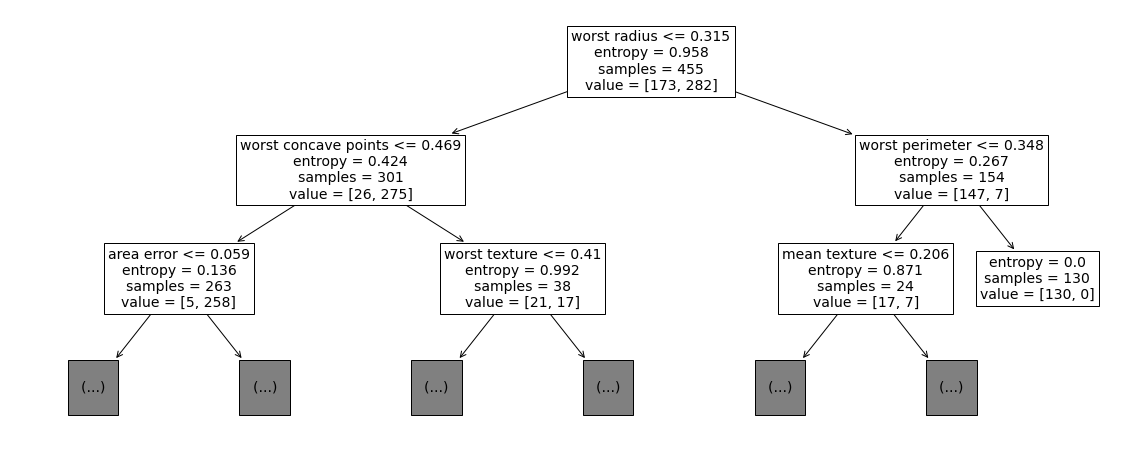

In [8]:
plt.figure(figsize = (20,8))
tree.plot_tree(dt, max_depth=2, feature_names=bc_dataset.feature_names, fontsize=14)

In [9]:
# KNN classifier
neigh.fit(X_train, y_train)
y_pred_knn = neigh.predict(X_test)

print(f"KNN Classifier Accuracy: {np.mean(y_pred_knn == y_test)*100:.3f}%")

KNN Classifier Accuracy: 99.123%


In [10]:
# LR classifier
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(f"LR Classifier Accuracy: {np.mean(y_pred_lr == y_test)*100:.3f}%")

LR Classifier Accuracy: 97.368%


Reduced space for Dummy Classifer


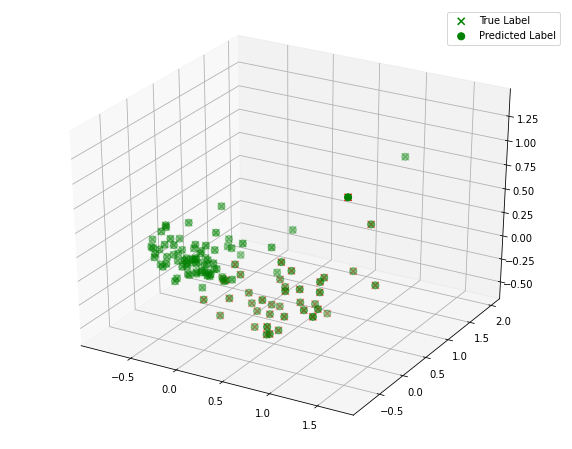

Reduced space for DT Classifer


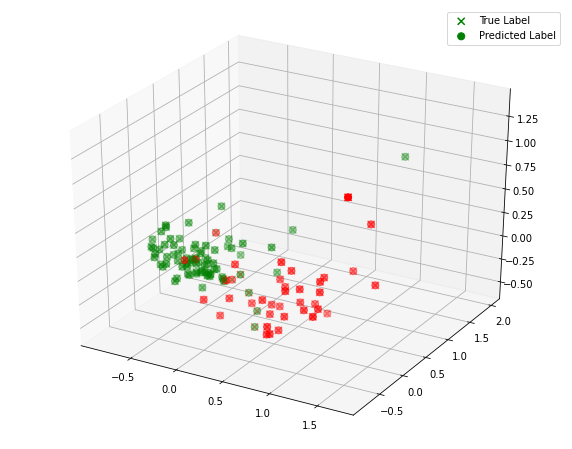

Reduced space for KNN Classifer


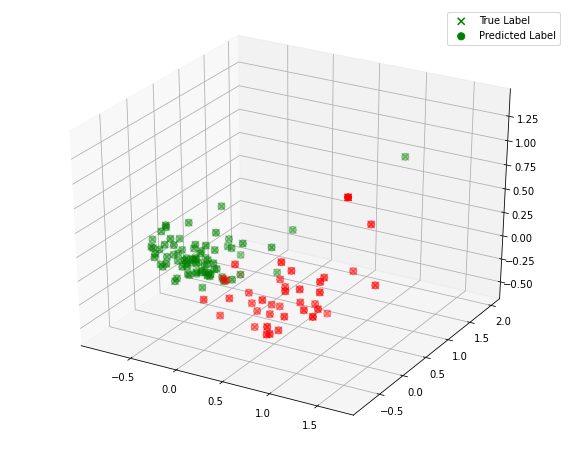

Reduced space for LR Classifer


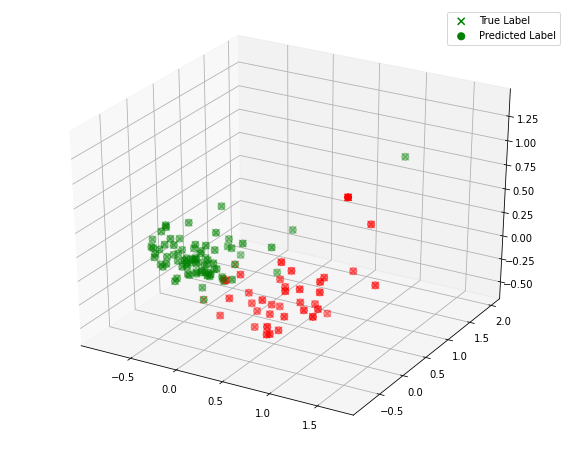

In [11]:
plot_reduced_space("Dummy Classifer", X_test, y_test, y_pred_dummy)
plot_reduced_space("DT Classifer", X_test, y_test, y_pred_dt)
plot_reduced_space("KNN Classifer", X_test, y_test, y_pred_knn)
plot_reduced_space("LR Classifer", X_test, y_test, y_pred_lr)

### Training on credit-g dataset
Note. For better comparison among classifiers, split each dataset into training and test datasets in ratio with 8:2.

In [12]:
data = cg_dataset.data.copy()
tar = np.where(cg_dataset.target=='good',1,0)
data.shape

(1000, 20)

Use one-hot encoding to preprocess catogorical features in credit_g dataset.

In [13]:
# one-hot encoding
cols = ['checking_status', 'credit_history', 'purpose','savings_status', 'employment',
        'personal_status', 'other_parties','property_magnitude',  'other_payment_plans',
       'housing','job', 'own_telephone','foreign_worker']
for col in cols:
  one_hot = pd.get_dummies(data[col],prefix=col)
  data = data.drop(col, axis = 1)
  data = pd.concat([data, one_hot], axis=1)

data.shape

(1000, 63)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data, tar, test_size=0.2, random_state=22, shuffle=True)

In [15]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [16]:
# Majority classifier
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

print(f"Dummy Classifier Accuracy: {np.mean(y_pred_dummy == y_test)*100:.3f}%")

Dummy Classifier Accuracy: 72.500%


In [17]:
# DT classifier
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(f"DT Classifier Accuracy: {np.mean(y_pred_dt == y_test)*100:.3f}%")

DT Classifier Accuracy: 69.500%


[Text(0.5, 0.875, 'checking_status_no checking <= 0.5\nentropy = 0.889\nsamples = 800\nvalue = [245, 555]'),
 Text(0.25, 0.625, 'duration <= 0.169\nentropy = 0.981\nsamples = 486\nvalue = [204, 282]'),
 Text(0.125, 0.375, 'credit_history_all paid <= 0.5\nentropy = 0.872\nsamples = 195\nvalue = [57, 138]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'checking_status_<0 <= 0.5\nentropy = 1.0\nsamples = 291\nvalue = [147, 144]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'credit_amount <= 0.2\nentropy = 0.559\nsamples = 314\nvalue = [41, 273]'),
 Text(0.625, 0.375, 'age <= 0.063\nentropy = 0.444\nsamples = 249\nvalue = [23, 226]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'employment_4<=X<7 <= 0.5\nentropy = 0.851\nsamples = 65\nvalue = [18, 47]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

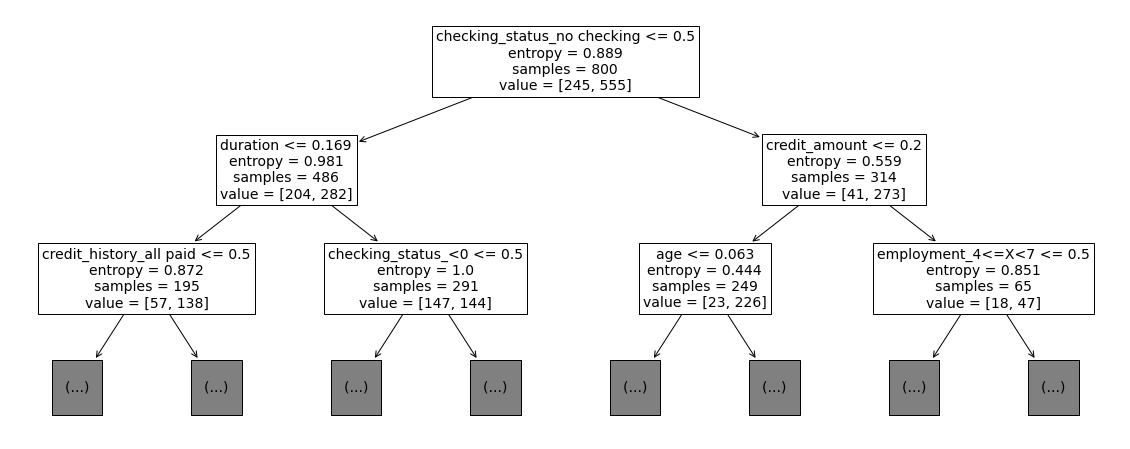

In [18]:
plt.figure(figsize = (20,8))
tree.plot_tree(dt, max_depth=2, feature_names=data.columns, fontsize=14)

In [19]:
# KNN classifier
neigh.fit(X_train, y_train)
y_pred_knn = neigh.predict(X_test)

print(f"KNN Classifier Accuracy: {np.mean(y_pred_knn == y_test)*100:.3f}%")

KNN Classifier Accuracy: 74.500%


In [20]:
# LR classifier
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(f"LR Classifier Accuracy: {np.mean(y_pred_lr == y_test)*100:.3f}%")

LR Classifier Accuracy: 80.500%


Reduced space for Dummy Classifer


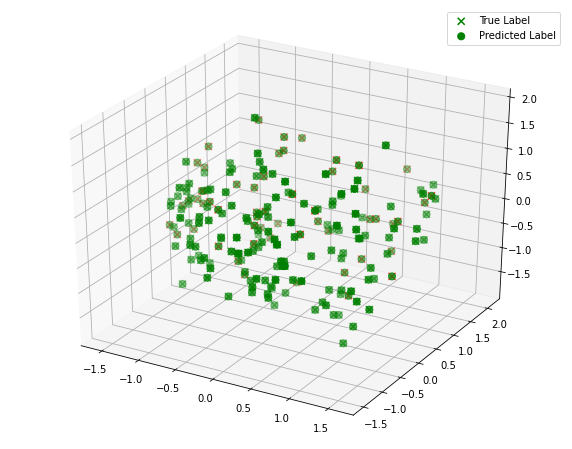

Reduced space for DT Classifer


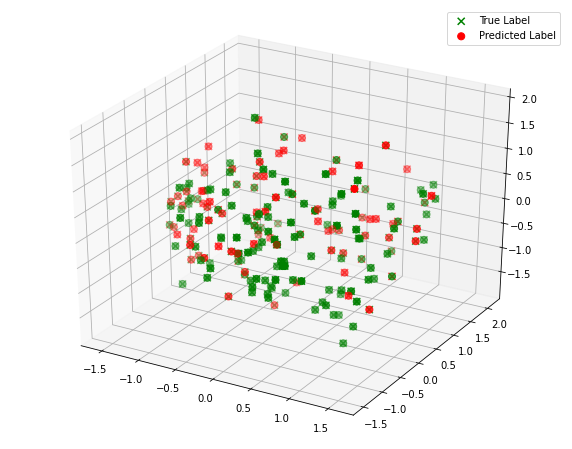

Reduced space for KNN Classifer


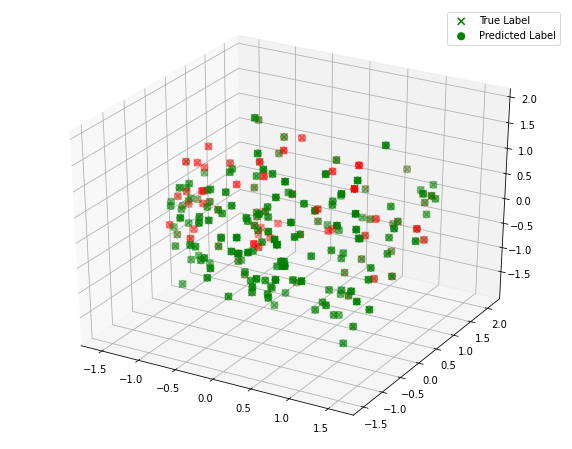

Reduced space for LR Classifer


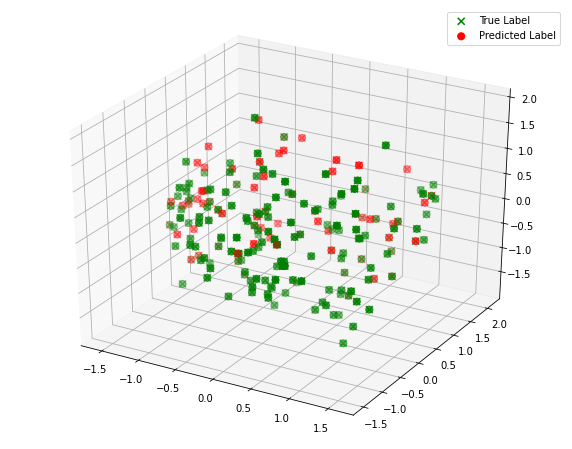

In [21]:
plot_reduced_space("Dummy Classifer", X_test, y_test, y_pred_dummy)
plot_reduced_space("DT Classifer", X_test, y_test, y_pred_dt)
plot_reduced_space("KNN Classifer", X_test, y_test, y_pred_knn)
plot_reduced_space("LR Classifer", X_test, y_test, y_pred_lr)

### Training on WSU dataset

In [22]:
har = pd.DataFrame(har)
data = har.iloc[:,:-1]
tar = har.iloc[:,-1].apply(lambda x: 0 if x==-1 else 1)
X_train, X_test, y_train, y_test = train_test_split(data, tar, test_size=0.3, random_state=23, shuffle = True)

In [23]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [24]:
# Majority classifier
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

print(f"Dummy Classifier Accuracy: {np.mean(y_pred_dummy == y_test)*100:.3f}%")

Dummy Classifier Accuracy: 51.791%


In [25]:
# DT classifier
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(f"Decision Tree Classifier Accuracy: {np.mean(y_pred_dt == y_test)*100:.3f}%")

Decision Tree Classifier Accuracy: 100.000%


[Text(0.5, 0.75, '520 <= 0.214\nentropy = 0.998\nsamples = 2539\nvalue = [1342, 1197]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 1342\nvalue = [1342, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 1197\nvalue = [0, 1197]')]

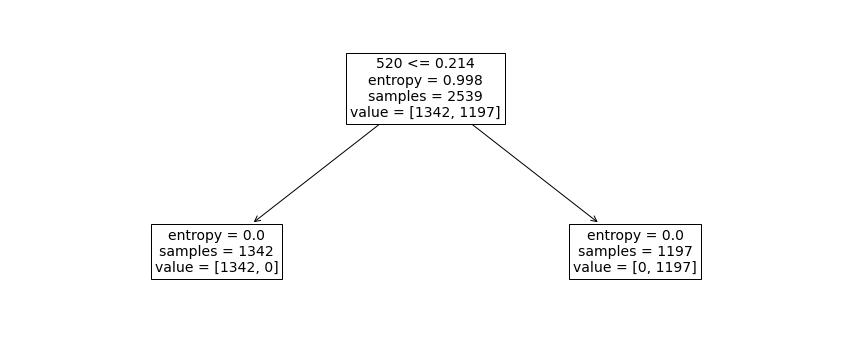

In [26]:
plt.figure(figsize = (15,6))
tree.plot_tree(dt, max_depth=2, feature_names=har.columns, fontsize=14)

In [27]:
# LR classifier
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(f"LR Classifier Accuracy: {np.mean(y_pred_lr == y_test)*100:.3f}%")

LR Classifier Accuracy: 100.000%


In [28]:
# KNN classifier
neigh.fit(X_train, y_train)
y_pred_knn = neigh.predict(X_test)

print(f"KNN Classifier Accuracy: {np.mean(y_pred_knn == y_test)*100:.3f}%")

KNN Classifier Accuracy: 100.000%


Reduced space for Dummy Classifer


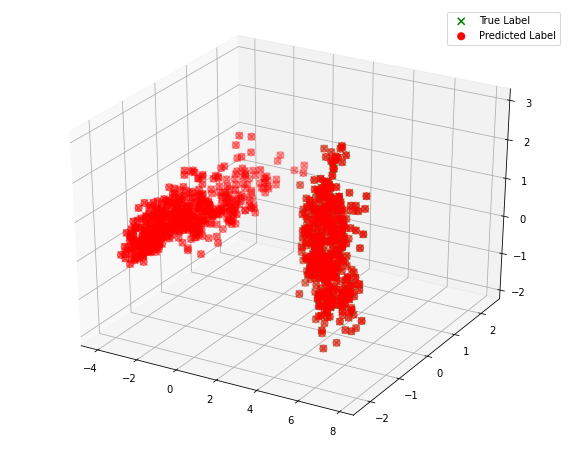

Reduced space for DT Classifer


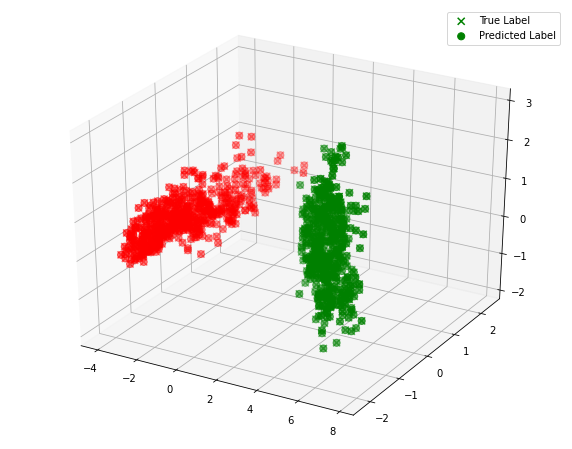

Reduced space for KNN Classifer


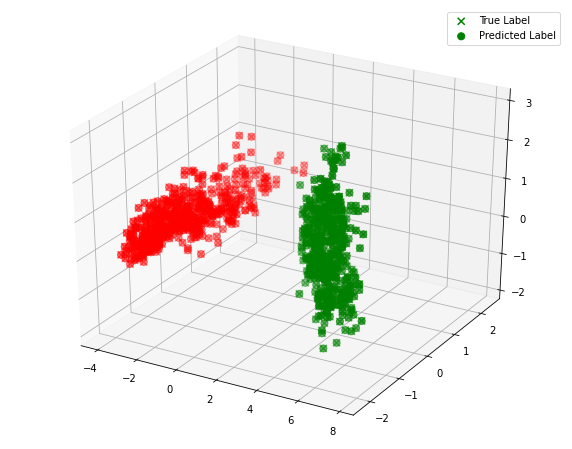

Reduced space for LR Classifer


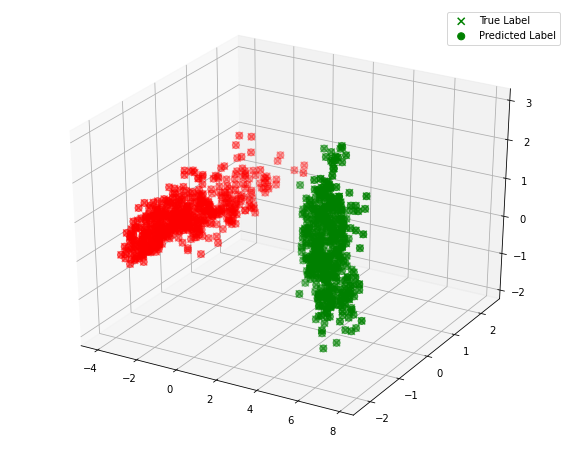

In [29]:
plot_reduced_space("Dummy Classifer", X_test, y_test, y_pred_dummy)
plot_reduced_space("DT Classifer", X_test, y_test, y_pred_dt)
plot_reduced_space("KNN Classifer", X_test, y_test, y_pred_knn)
plot_reduced_space("LR Classifer", X_test, y_test, y_pred_lr)

## 3) Discussion

Logistic Rregression performs best as it reaches best accuracy on three datasets in general. WSU dataset is the easiest to predict since from its PCA plot, data points of each label are sperated in 3D place, which makes classifer easier to learn features of different groups of data.